In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from bokeh.io import output_notebook
from bokeh.charts import Scatter, show
%matplotlib inline
output_notebook()

Loading BokehJS ...

In [22]:
df = pd.read_csv("home_data.csv", parse_dates=["date"])

In [23]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [27]:
p = Scatter(df, x="sqft_living", y="price", 
            tooltips=[("sqft_living", "@sqft_living"),
                      ("price", "@price")])
show(p)

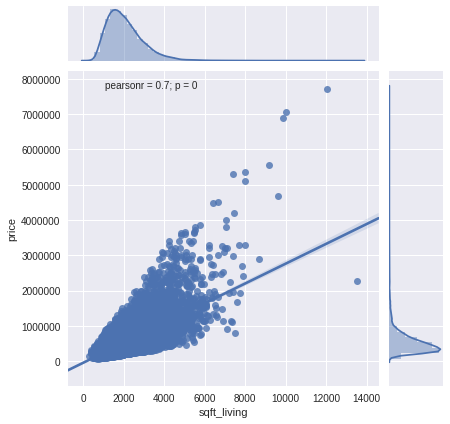

In [16]:
sns.jointplot("sqft_living", "price", data=df, kind="reg")

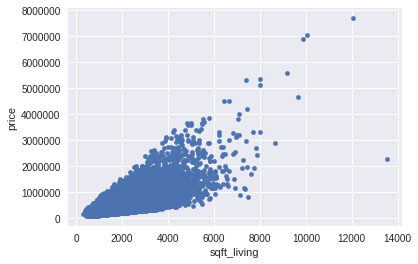

In [17]:
df.plot.scatter(x="sqft_living", y="price")

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [30]:
train_X, test_X = train_test_split(df, train_size=.8, random_state=0)

In [31]:
from sklearn.linear_model import LinearRegression

In [68]:
sqft_model = LinearRegression().fit(train_X[["sqft_living"]], train_X["price"])

In [33]:
test_X["price"].mean()

529242.6106870229

In [69]:
# RMSE
predicted = sqft_model.predict(test_X[["sqft_living"]])
mean_squared_error(test_X["price"], predicted)**.5

248879.06143647007

In [45]:
# max error
(predicted - test_X["price"]).abs().max()

3005746.3356707077

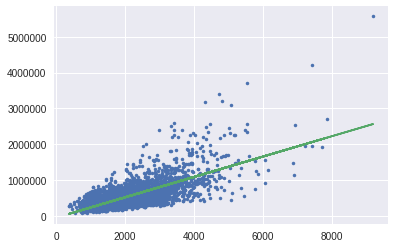

In [70]:
plt.plot(test_X['sqft_living'],test_X['price'],'.',
        test_X['sqft_living'], predicted,'-')

In [71]:
sqft_model.coef_

array([ 283.96855737])

In [66]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

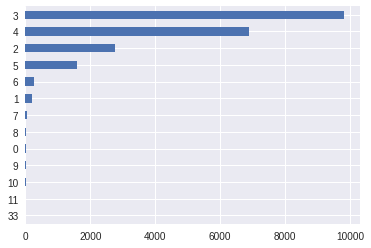

In [55]:
df.bedrooms.value_counts()[::-1].plot(kind="barh")

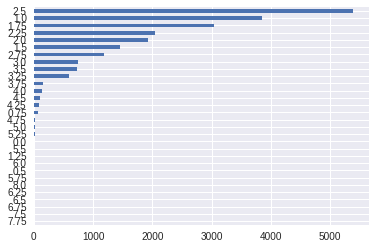

In [56]:
df.bathrooms.value_counts()[::-1].plot(kind="barh")

In [57]:
df.sqft_living.describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

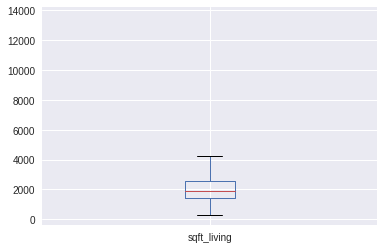

In [58]:
df.sqft_living.plot("box")

In [59]:
df.sqft_lot.describe()

count    2.161300e+04
mean     1.510697e+04
std      4.142051e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068800e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

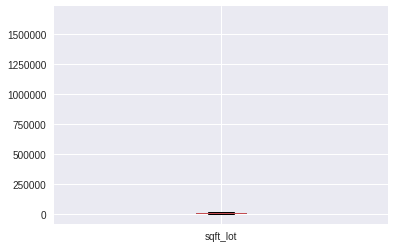

In [60]:
df.sqft_lot.plot.box()

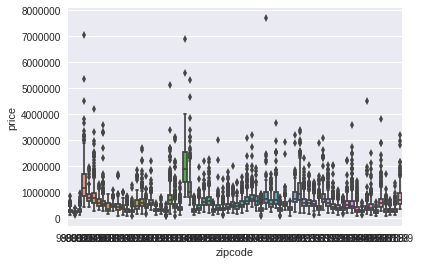

In [61]:
ax = sns.boxplot(x="zipcode", y="price", data=df)

In [65]:
from bokeh.charts import BoxPlot

p = BoxPlot(df, values="price", label="zipcode",
            outliers=False, legend=False)

show(p)

In [67]:
le = LinearRegression().fit(train_X[my_features], train_X["price"])

In [73]:
# RMSE
sqft_predicted = sqft_model.predict(test_X[["sqft_living"]])

le_predicted = le.predict(test_X[my_features])

print(mean_squared_error(test_X["price"], sqft_predicted)**.5)
print(mean_squared_error(test_X["price"], le_predicted)**.5)

248879.061436
244004.774431


In [74]:
# max error

print((sqft_predicted - test_X["price"]).abs().max())
print((le_predicted - test_X["price"]).abs().max())

3005746.33567
2829477.00188


In [76]:
house1 = df[df['id']==5309101200]

In [77]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,2014-06-05,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [78]:
house1['price']

1054    620000
Name: price, dtype: int64

In [87]:
sqft_model.predict(house1.sqft_living.values.reshape(1, 1))

array([ 633267.47422744])

In [88]:
le.predict(house1[my_features])

array([ 637556.26515922])

In [89]:
house2 = df[df['id']==1925069082]

In [90]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,2015-05-11,2200000,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [91]:
sqft_model.predict(house2.sqft_living.values.reshape(1, 1))

array([ 1269357.04273158])

In [92]:
le.predict(house2[my_features])

array([ 1274443.76531342])

## Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [96]:
bill_gates = pd.DataFrame({'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]})

In [97]:
sqft_model.predict(bill_gates.sqft_living.values.reshape(1, 1))

array([ 14150170.80494038])

In [98]:
le.predict(bill_gates[my_features])

array([ 15796988.23574052])